In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../../thesis/references/TestAccurracy.csv', sep=';')
df.head()

,id,set,year,onset_date,y_true,pred_date,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,34,test,1985.0,30.05.1985,1.0,05/29,1.24,0.2358,0.2358,-0.05,-1.0528,1.0528
1,34,test,1985.0,30.05.1985,2.0,05/28,1.56,-0.4440,0.4440,0.07,-1.9341,1.9341
2,34,test,1985.0,30.05.1985,3.0,05/27,2.07,-0.9344,0.9344,0.88,-2.1163,2.1163
3,34,test,1985.0,30.05.1985,4.0,05/26,3.14,-0.8569,0.8569,1.91,-2.0944,2.0944
4,34,test,1985.0,30.05.1985,5.0,05/25,4.26,-0.7444,0.7444,2.51,-2.4933,2.4933


In [3]:
df = df.sort_values(by='pred_date')

In [4]:
df.isna().sum()

id                    0
set                   0
year                150
onset_date          150
y_true              150
pred_date             0
y_pred_best           0
error_best            0
error_abs_best        0
y_pred_latest         0
error_latest          0
error_abs_latest      0
dtype: int64

In [5]:
year_groups = df[df['id'] > 31].groupby(['set', 'year']).mean().reset_index()
year_groups

,set,year,id,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,dev,1980.0,33.5,15.5,14.971750,-0.528055,2.383538,16.263917,0.763852,1.775763
1,dev,1990.0,33.5,15.5,21.568833,6.068689,6.106184,27.244917,11.744675,11.744675
2,dev,2000.0,33.5,15.5,10.730167,-4.769117,4.832505,12.328250,-3.172198,3.530083
3,dev,2010.0,33.5,15.5,19.563417,4.063228,5.682753,21.540083,6.040194,6.390097
4,dev,2016.0,33.5,15.5,11.433667,-4.066072,4.171243,11.983250,-3.516962,3.866602
5,test,1985.0,34.0,15.5,13.089867,-2.410404,3.420748,15.653067,0.152516,2.024433
6,test,1995.0,34.0,15.5,12.325867,-3.174174,4.304634,15.503800,0.003843,2.812427
7,test,2003.0,34.0,15.5,12.652400,-2.847811,3.665082,13.995267,-1.504800,2.569875
8,test,2004.0,34.0,15.5,17.680533,2.179973,3.840507,18.673400,3.173268,4.556256
9,test,2005.0,34.0,15.5,13.269467,-2.230465,4.181041,13.752467,-1.747227,3.535317


In [6]:
df.groupby(['onset_date']).mean()

,id,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
onset_date,,,,,,,,,
01.06.2013,29.5,2013.0,15.5,18.851500,3.351878,4.423040,21.089000,5.589216,5.589536
03.06.2000,33.5,2000.0,15.5,10.730167,-4.769117,4.832505,12.328250,-3.172198,3.530083
04.06.1980,33.5,1980.0,15.5,14.971750,-0.528055,2.383538,16.263917,0.763852,1.775763
05.06.2012,29.5,2012.0,15.5,16.786250,1.285964,3.466604,17.622417,2.122094,2.360507
05.06.2015,32.0,2015.0,15.5,14.549074,-0.950840,2.958010,15.109148,-0.390745,2.537334
06.06.2014,32.0,2014.0,15.5,18.078926,2.578917,3.964505,19.029259,3.529346,4.538392
07.06.2005,34.0,2005.0,15.5,13.269467,-2.230465,4.181041,13.752467,-1.747227,3.535317
08.06.2007,29.5,2007.0,15.5,5.286917,-10.213093,10.213093,4.453250,-11.046916,11.046916
08.06.2016,31.5,2016.0,15.5,12.186375,-3.313863,3.698482,13.117458,-2.382558,2.812397


In [7]:
df.groupby(['set']).mean()

,id,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
set,,,,,,,,,
dev,32.243902,2002.888889,15.5,14.987837,1.378251,6.631368,16.740805,3.130891,7.575590
test,32.000000,2008.638889,15.5,15.475370,-0.024778,3.731271,16.918380,1.418409,3.330405


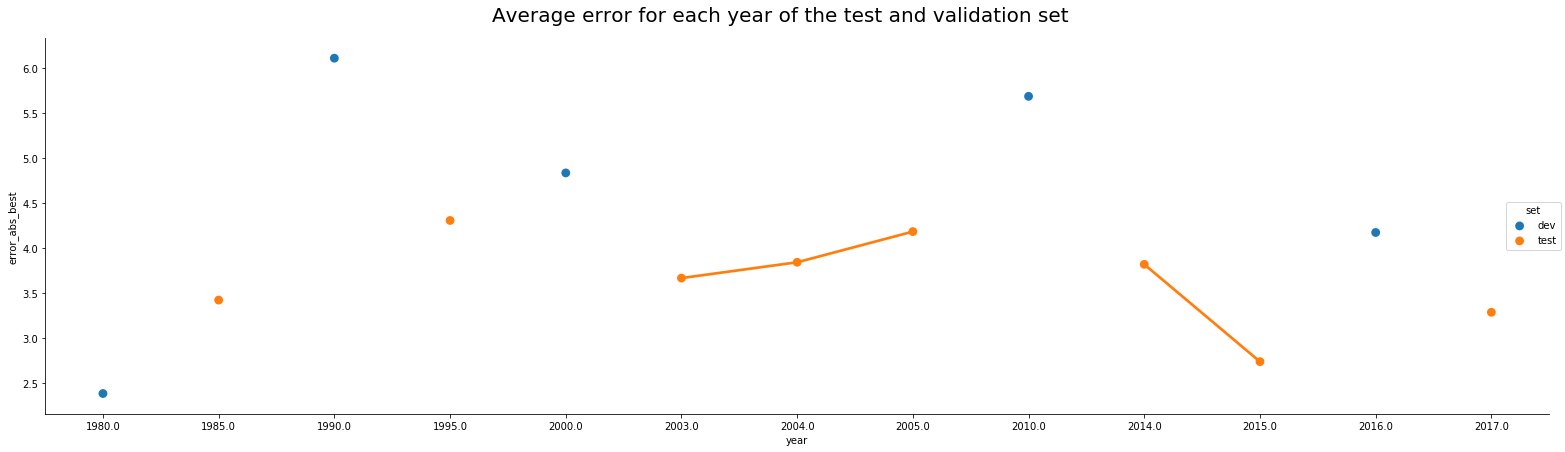

In [8]:
g = sns.factorplot(data=year_groups, x='year', y='error_abs_best', hue='set', aspect=3.5, size=6)

ttl = g.fig.suptitle('Average error for each year of the test and validation set', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_years.png')

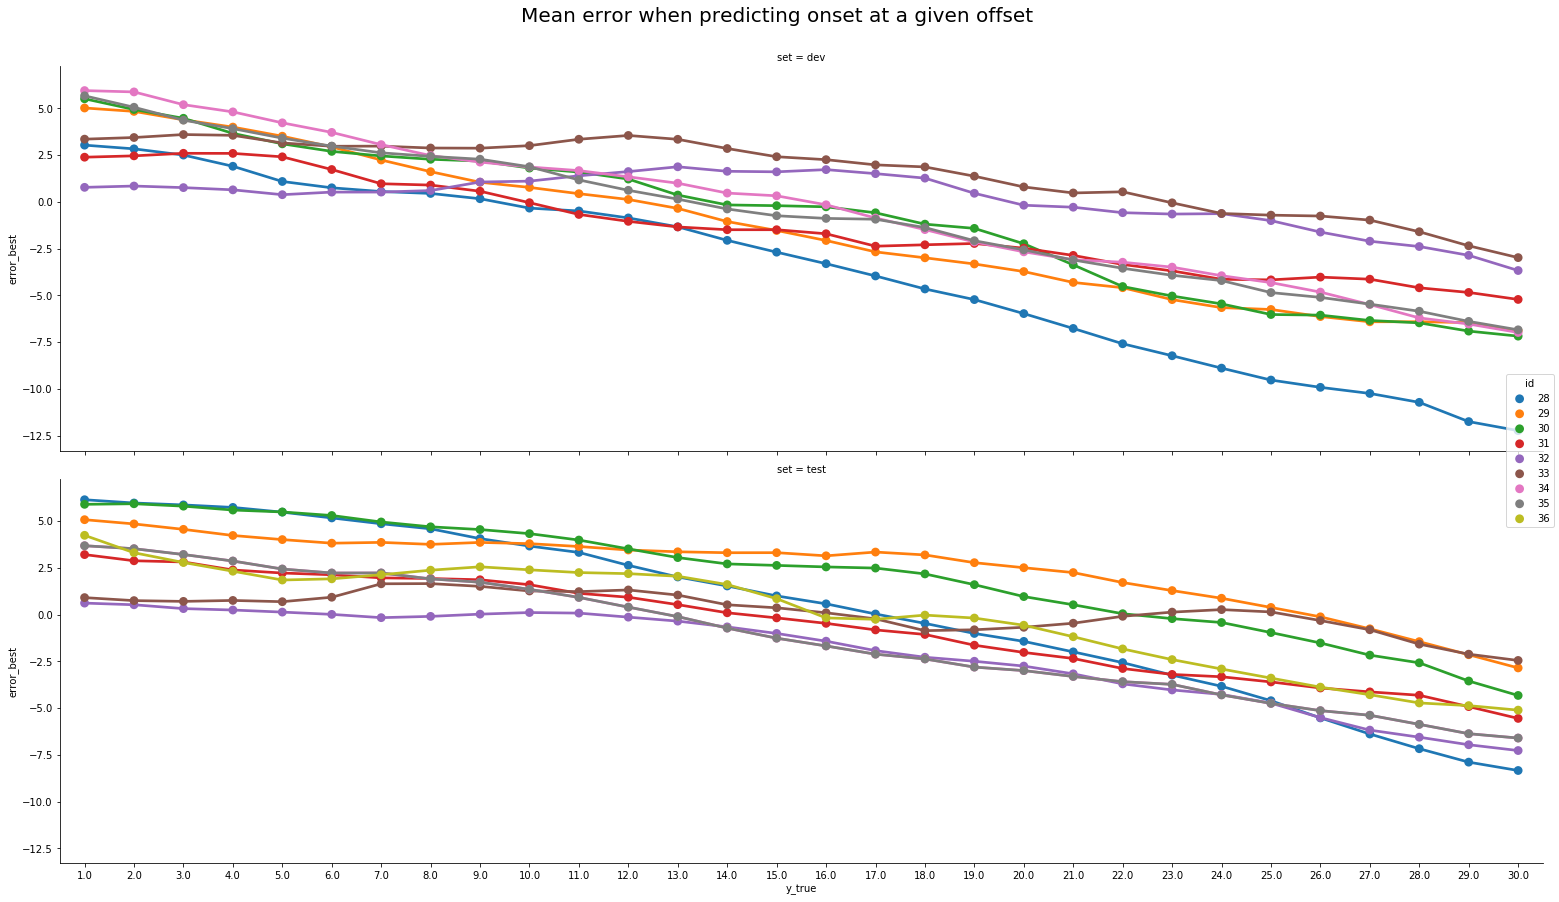

In [9]:
g = sns.factorplot(data=df, x='y_true', y='error_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_error_offset.png')

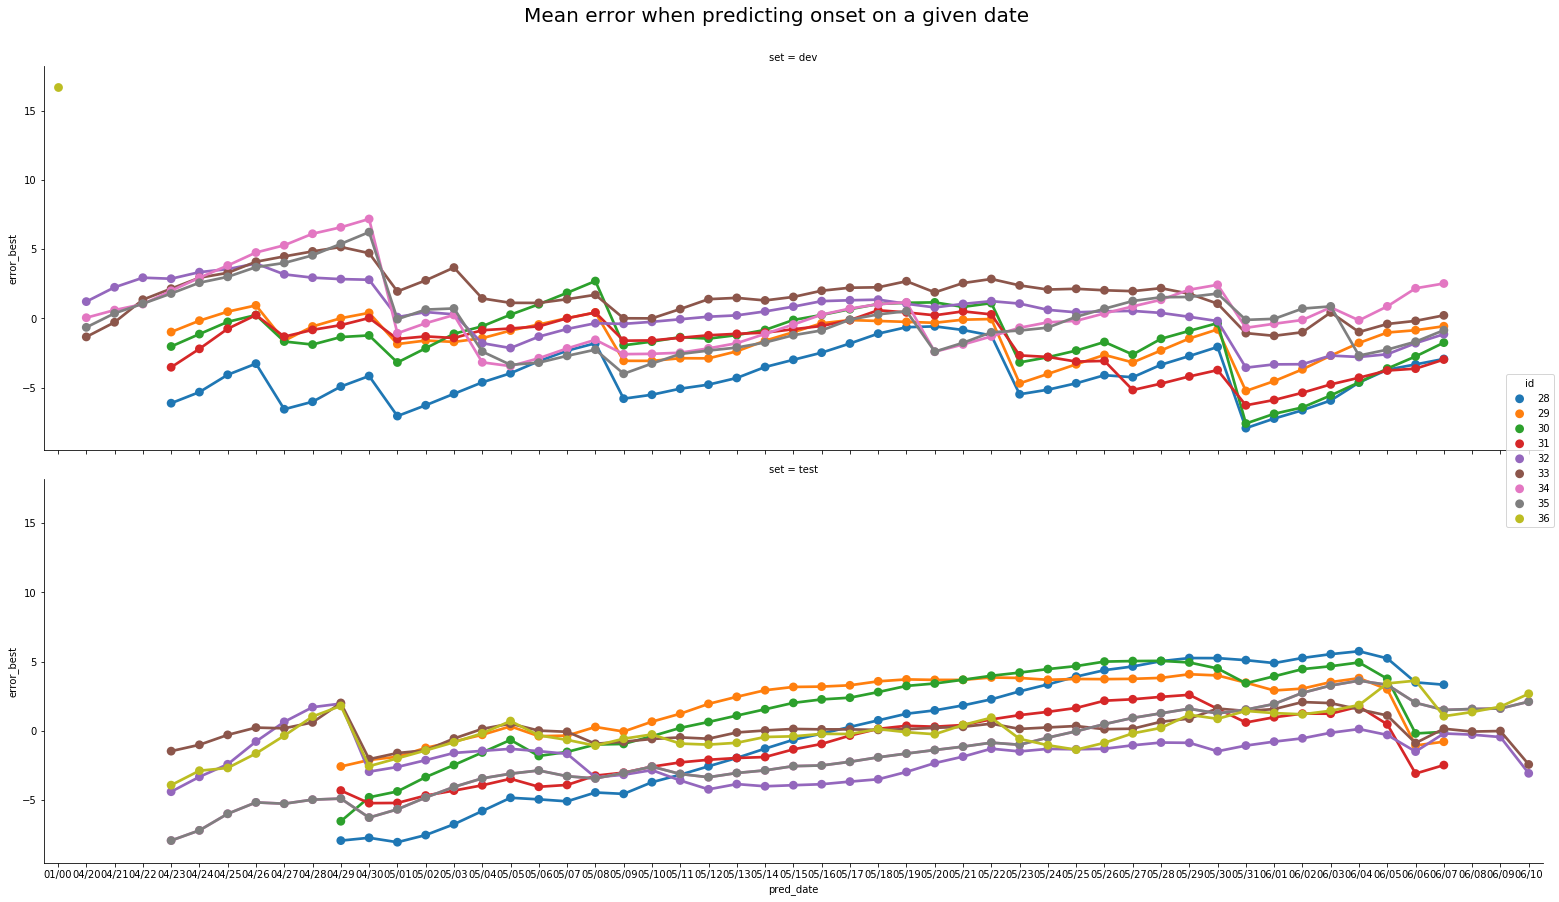

In [11]:
g = sns.factorplot(data=df, x='pred_date', y='error_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_error_dates.png')

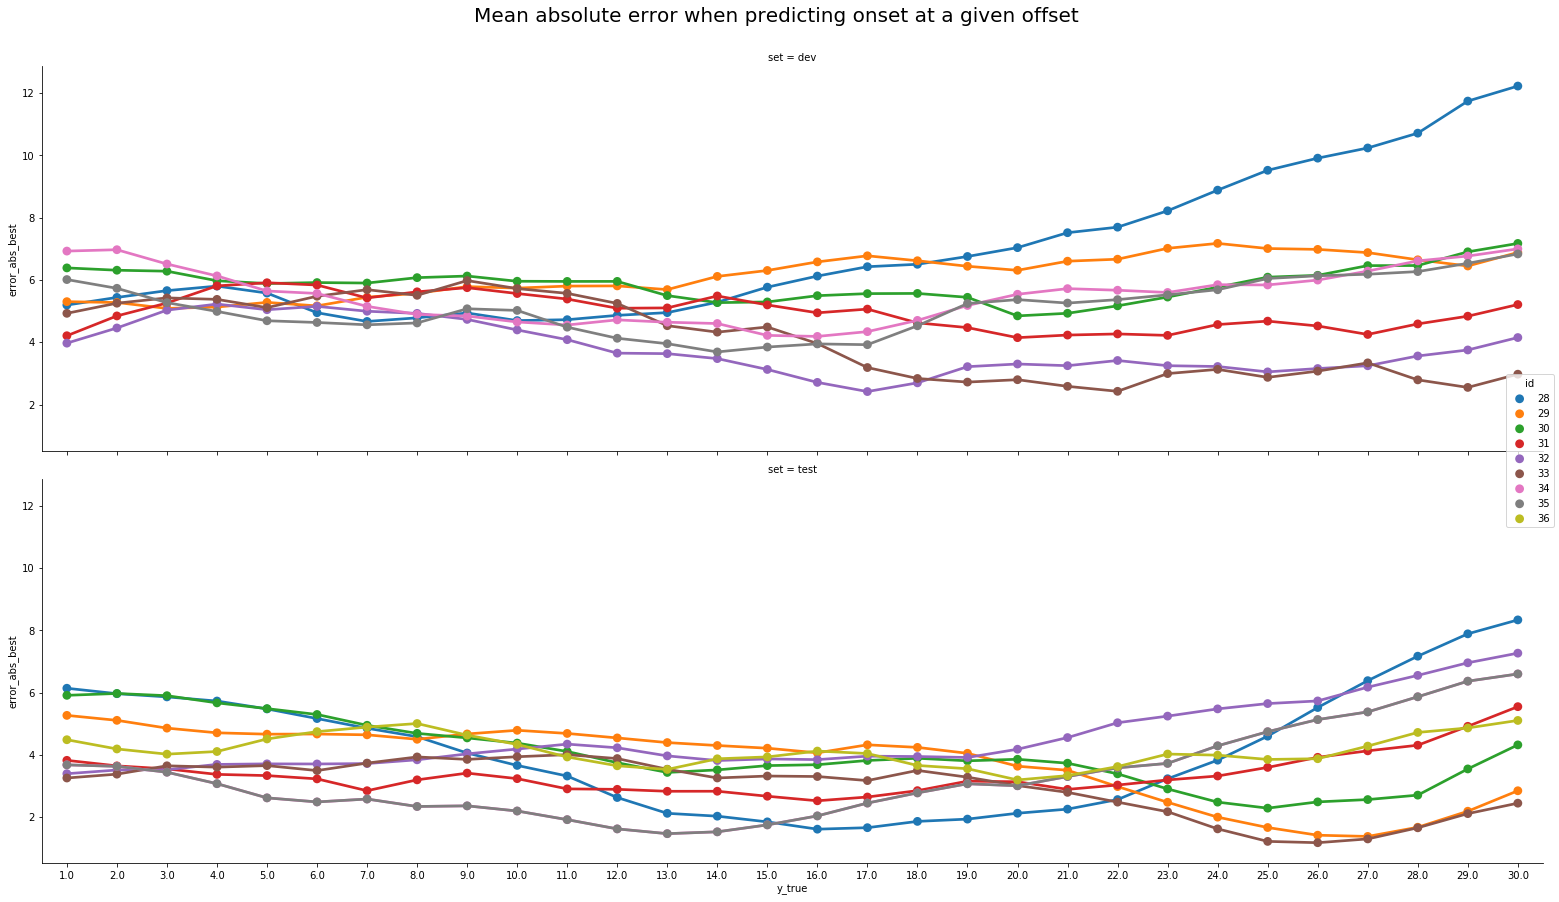

In [12]:
g = sns.factorplot(data=df, x='y_true', y='error_abs_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_accuracy_offset.png')

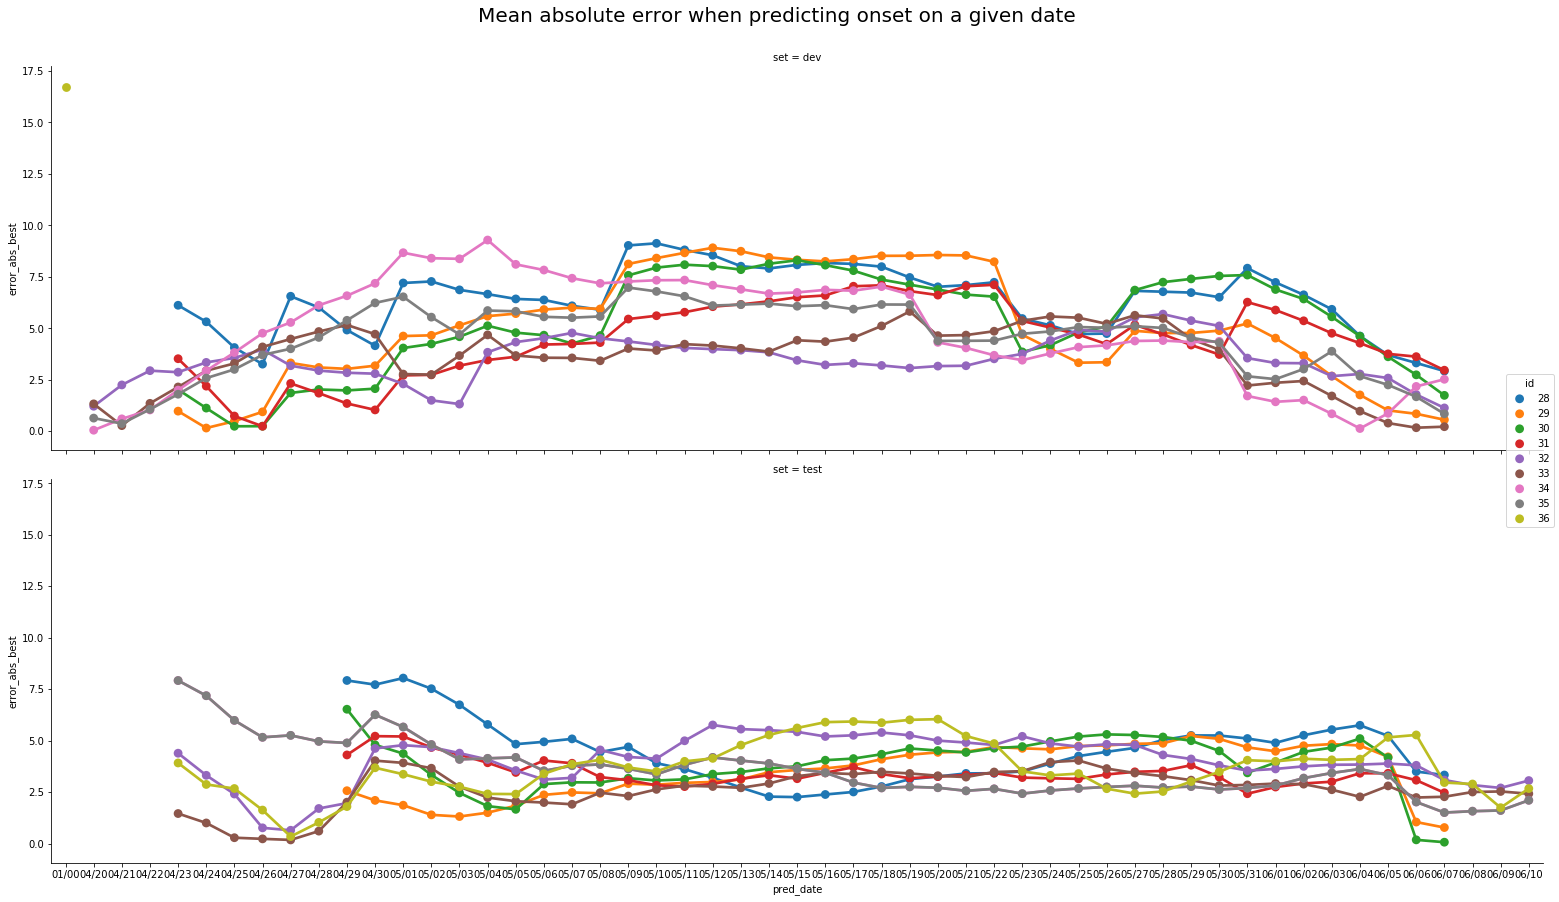

In [13]:
g = sns.factorplot(data=df, x='pred_date', y='error_abs_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_accuracy_dates.png')